# MULTIMODAL CLASSIFICATION

In [791]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, StratifiedKFold, StratifiedShuffleSplit

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
#from tensorflow.keras.models import Sequential
##from tensorflow.keras.layers import Dense
#from keras.wrappers.scikit_learn import KerasClassifier


from sklearn.metrics import mean_absolute_error, accuracy_score, classification_report, confusion_matrix
df1 = pd.read_csv('C:/Users/rimba/Downloads/Multimodal-dataset.csv')
print('Dataframe shape: ', df1.shape)
df1.head()

Dataframe shape:  (61, 204)


,Age,Ménopausée,Groupe_dâge,Tranche dâge,Origine,Ménarche,Première_grossesse,Parité,Parité Répartition,Gestité,...,Délai de confirmation,Traitement_radical,Délai chimiothérapie-chirurgie,Délai radiothérapie-chirurgie,Délai hormonothérapie-chirurgie,Délai de récidive locorégionale,Délai de rechute métastatique,Délai de bilatéralisation,Délai_chir_rt_grp,image_path
0,50,1,50-59ans,36-69 ans,citadine,11.0,24.0,2,Multipare,2,...,37.0,oui,NaN,97.0,1960.0,NaN,NaN,NaN,91-180 jours,"""C:/Users/rimba/Desktop/image/0/zrida-hayet-dr..."
1,63,1,60-69ans,36-69 ans,rurale,NaN,NaN,7,Multipare,7,...,32.0,oui,66.0,NaN,NaN,1492.0,1492.0,NaN,NaN,"""C:/Users/rimba/Desktop/image/1/Saidi-Cherifa-..."
2,37,0,40ans <,36-69 ans,citadine,14.0,27.0,2,Multipare,2,...,NaN,non,NaN,266.0,NaN,NaN,NaN,NaN,>180 jours,"""C:/Users/rimba/Desktop/image/0/Zouhour-Riahi-..."
3,45,1,40-49ans,36-69 ans,rurale,15.0,0.0,0,Nullipare,0,...,6.0,non,NaN,88.0,1827.0,NaN,NaN,NaN,<90 jours,"""C:/Users/rimba/Desktop/image/0/MONIA DRIDI AX..."
4,68,1,60-69ans,36-69 ans,rurale,14.0,19.0,6,Multipare,6,...,64.0,non,NaN,203.0,1826.0,NaN,NaN,NaN,>180 jours,"""C:/Users/rimba/Desktop/image/0/ZINA MECHRAWI ..."


In [792]:
import json
import math
import os
import cv2
from PIL import Image
import numpy as np
from keras import layers
from keras.applications import ResNet50,MobileNet, DenseNet201, InceptionV3, NASNetLarge, InceptionResNetV2, NASNetMobile
from keras.callbacks import Callback, ModelCheckpoint, ReduceLROnPlateau, TensorBoard
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.optimizers import Adam
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import cohen_kappa_score, accuracy_score
import scipy
from tqdm import tqdm
import tensorflow as tf
from keras import backend as K
import gc
from functools import partial
from sklearn import metrics
from collections import Counter
import json
import itertools

In [793]:
df1['Tolérance_à_la_chimiothérapie'].fillna('Aucune', inplace=True)
#df1['Fin Radiothérapie'].fillna('Aucune', inplace=True)
#df1['Début Chimiothérapie'].fillna('Aucune', inplace=True)
#df1['Fin Chimiothérapie'].fillna('Aucune', inplace=True)
df1['Champs_dirradiation'].fillna('no irradiation', inplace=True)
df1['Tolérance_Radiothérapie'].fillna('Aucune', inplace=True)
df1['Type_Chimiothérapie'].fillna('Aucune', inplace=True)
df1['Type_Hormonothérapie'].fillna('Aucune', inplace=True)
df1['Nombre_de_cures_de_chimiothérapie'].fillna(0,inplace=True)
df1['Nombre_de_cures_Herceptine'].fillna(0,inplace=True)
df1['Tolérance_Herceptine'].fillna('NON',inplace=True)
df1['%RO'].fillna(0,inplace=True)
df1['%RP'].fillna(0,inplace=True)
df1['Ménarche'].fillna(df1['Ménarche'].mean(),inplace=True)
df1['Première_grossesse'].fillna(df1['Première_grossesse'].mean(),inplace=True)
#df1['Type_histologique_de_la_bilatéralisation'].fillna('Aucune',inplace=True)
#df1['Traitement_Bilatéralisation'].fillna('Aucune',inplace=True)
#df1['Date_Métastases'].fillna('Aucune',inplace=True)
#df1['Siège_Métastases'].fillna('Aucune',inplace=True)
#df1['Siège Métastases'].fillna('Aucune',inplace=True)
df1['Ht_cons'].fillna('Non',inplace=True)
df1['Dose_dirradiation'].fillna(0,inplace=True)
df1['Méthode_du_ganglion_sentinelle'].fillna('Aucune',inplace=True)
df1['Nombre_des_ganglions_sentinelles'].fillna(0,inplace=True)
df1['Aspect_du_ganglion_sentinelle'].fillna('Aucun',inplace=True)
df1['Nombre_des_ganglions_du_curage_axillaire'].fillna(0,inplace=True)
df1['Ki67'].fillna(0,inplace=True)
df1['Sous-type_Moléculaire'].fillna('Aucun',inplace=True)
df1['Stade_T'].fillna('Tx',inplace=True)
df1['Stade_N'].fillna('Nx',inplace=True)
df1['Stade'].fillna('STADE X',inplace=True)
df1['Grade_SBR'].fillna('GRADE II',inplace=True)
#df1['Sous-type Moléculaire'].fillna('Aucun',inplace=True)
#df1['Groupe_CA'].fillna(0,inplace=True)
#df1['Taille_tumorale_intervalle'].fillna('30-39 mm',inplace=True)
df1['Castration'].fillna('Aucune',inplace=True)
#df1['CT_Métastases'].fillna('Aucune',inplace=True)
#df1['Type_CT_Métastases'].fillna('Aucune',inplace=True)
df1['Etat du reste de la glande'].fillna('Saine', inplace=True)
df1['Délai radiothérapie-chirurgie'].fillna(0,inplace=True)
df1['Durée'].fillna(0,inplace=True)
df1['Nombre_des_ganglions_sentinelles']

0      0.0
1      0.0
2      0.0
3      0.0
4      4.0
5      4.0
6      2.0
7      0.0
8      0.0
9      0.0
10     0.0
11     0.0
12     0.0
13     0.0
14     0.0
15     0.0
16     0.0
17     0.0
18    10.0
19     0.0
20     0.0
21     0.0
22     0.0
23     0.0
24     0.0
25     0.0
26     0.0
27     0.0
28     0.0
29     0.0
30     0.0
31     0.0
32     0.0
33     0.0
34     0.0
35     0.0
36     0.0
37     0.0
38     0.0
39     1.0
40     0.0
41     0.0
42     0.0
43     0.0
44     0.0
45     0.0
46     0.0
47     0.0
48     0.0
49     0.0
50     0.0
51     0.0
52     0.0
53     0.0
54     0.0
55     0.0
56     0.0
57     0.0
58     0.0
59     0.0
60     0.0
Name: Nombre_des_ganglions_sentinelles, dtype: float64

In [794]:
def remplir_valeurs_manquantes(row):
    if pd.isna(row['Recoupe_du_lit_tumoral']):
        if row['Grade_SBR'] == 'GRADE I':
            return 'SAINE'
        elif row['Grade_SBR'] == 'GRADE II':
            return 'ENVAHIE'
        else :
            return 'ENVAHIE'
    else:
        return row['Recoupe_du_lit_tumoral']

# Appliquer la fonction sur chaque ligne du DataFrame
df1['Recoupe_du_lit_tumoral'] = df1.apply(remplir_valeurs_manquantes, axis=1)

In [795]:
mapping = {'une': 1, 'deux': 2, 'trois': 3, 'quatre': 4}

# Utiliser la méthode `replace()` de pandas pour remplacer les chaînes de caractères par des nombres
df1['Nombre_des_tumeurs'] = df1['Nombre_des_tumeurs'].replace(mapping)
df1['Nombre_des_tumeurs'].dtype

dtype('int64')

In [796]:
mapping = {'GRADE I': 1, 'GRADE II': 2, 'GRADE  III': 3}

# Utiliser la méthode `replace()` de pandas pour remplacer les chaînes de caractères par des nombres
df1['Grade_SBR'] = df1['Grade_SBR'].replace(mapping)

In [797]:
mapping = {'NON': 0, 'OUI': 1,' ': ' '}

# Utiliser la méthode `replace()` de pandas pour remplacer les chaînes de caractères par des nombres
df1['Nodule'] = df1['Nodule'].replace(mapping)

In [798]:
mapping = {'NON': 0, 'OUI': 1,' ': ' '}

# Utiliser la méthode `replace()` de pandas pour remplacer les chaînes de caractères par des nombres
df1['Tumeur visible'] = df1['Tumeur visible'].replace(mapping)

In [799]:
mapping = {'OUI': 1}

# Utiliser la méthode `replace()` de pandas pour remplacer les chaînes de caractères par des nombres
df1['Chirurgie'] = df1['Chirurgie'].replace(mapping)

In [800]:
mapping = {'SUSPECT': 0, 'BENIN':1, ' ':' '}

# Utiliser la méthode `replace()` de pandas pour remplacer les chaînes de caractères par des nombres
df1['Caractère'] = df1['Caractère'].replace(mapping)

In [801]:
mapping = {'NODULE SUSPECT': 0, 'NODULE BENIN':1, 'NORMALE':'2'}

# Utiliser la méthode `replace()` de pandas pour remplacer les chaînes de caractères par des nombres
df1['Echographie mammaire du sein atteint'] = df1['Echographie mammaire du sein atteint'].replace(mapping)

In [802]:
mapping = {'NON': 0, 'OUI':1, ' ':' '}

# Utiliser la méthode `replace()` de pandas pour remplacer les chaînes de caractères par des nombres
df1['Opacité'] = df1['Opacité'].replace(mapping)

In [803]:
mapping = {'SUSPECT': 0, 'BENIN':1, ' ':' '}

# Utiliser la méthode `replace()` de pandas pour remplacer les chaînes de caractères par des nombres
df1['Caractère de lopacité'] = df1['Caractère de lopacité'].replace(mapping)

In [804]:
mapping = {'NON': 0, 'OUI':1, ' ':' '}

# Utiliser la méthode `replace()` de pandas pour remplacer les chaînes de caractères par des nombres
df1['ADP axillaire à léchographie'] = df1['ADP axillaire à léchographie'].replace(mapping)

In [805]:
le = LabelEncoder()
df1['Embols_vasculaires'] = le.fit_transform(df1['Embols_vasculaires'])
df1['Sein_atteint'] = le.fit_transform(df1['Sein_atteint'])
#df1['Récidive_loco-régionale'] = le.fit_transform(df1['Récidive_loco-régionale'])
df1['Hormonothérapie'] = le.fit_transform(df1['Hormonothérapie'])
df1['Tumorectomie'] = le.fit_transform(df1['Tumorectomie'])
df1['Chimiothérapie'] = le.fit_transform(df1['Chimiothérapie'])
df1['Herceptine'] = le.fit_transform(df1['Herceptine'])
#df1['Bilatéralisation'] = le.fit_transform(df1['Bilatéralisation'])
df1['Rechute'] = le.fit_transform(df1['Rechute'])
df1['Traitement_radical'] = le.fit_transform(df1['Traitement_radical'])
df1['Radiothérapie'] = le.fit_transform(df1['Radiothérapie'])
df1['Tolérance_Herceptine'] = le.fit_transform(df1['Tolérance_Herceptine'])
df1['Antécédents_familiaux_de_cancer_du_sein'] = le.fit_transform(df1['Antécédents_familiaux_de_cancer_du_sein'])
df1['RO'] = le.fit_transform(df1['RO'])
df1['RP'] = le.fit_transform(df1['RP'])
df1['Ht_cons'] = le.fit_transform(df1['Ht_cons'])
df1['Multifocalité'] = le.fit_transform(df1['Multifocalité'])
df1['Recoupe_du_lit_tumoral'] = le.fit_transform(df1['Recoupe_du_lit_tumoral'])
df1['Récepteurs_hormonaux'] = le.fit_transform(df1['Récepteurs_hormonaux'])
df1['Origine'] = le.fit_transform(df1['Origine'])
df1['Type_de_chirurgie'] = le.fit_transform(df1['Type_de_chirurgie'])
df1['Ganglion_sentinelle'] = le.fit_transform(df1['Ganglion_sentinelle'])
#df1['Lieu_chirurgie'] = le.fit_transform(df1['Lieu_chirurgie'])
df1['Antécédents_mammaires'] = le.fit_transform(df1['Antécédents_mammaires'])
df1['Rechute']

0     0
1     1
2     0
3     0
4     0
5     1
6     0
7     0
8     1
9     1
10    0
11    1
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    1
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    0
39    0
40    1
41    0
42    0
43    0
44    0
45    0
46    0
47    0
48    0
49    0
50    0
51    0
52    0
53    0
54    0
55    0
56    1
57    1
58    0
59    0
60    0
Name: Rechute, dtype: int32

In [806]:
from sklearn.impute import KNNImputer
# Créer un imputer k-plus proches voisins avec k=5
imputer = KNNImputer(n_neighbors=5)
# Remplacer les valeurs manquantes de la colonne sélectionnée en utilisant la méthode k-plus proches voisins
df1['Index_mitotique'] = imputer.fit_transform(df1[['Index_mitotique']+['Grade_SBR','Multifocalité','Taille_tumorale','Nombre_des_tumeurs']])
df1['Index_mitotique']

0      4.0
1      3.0
2     16.0
3      4.0
4      5.0
5      5.8
6      5.8
7      2.0
8      4.0
9     14.0
10     6.0
11    10.0
12     5.0
13     5.0
14     5.0
15     6.6
16     6.6
17     8.0
18     6.8
19     5.0
20     6.4
21     7.0
22     6.4
23     6.4
24     6.0
25     3.0
26    10.0
27     6.0
28    15.2
29    16.0
30    16.0
31    18.0
32    14.0
33    36.0
34     6.0
35    16.0
36    45.0
37    20.6
38    12.0
39     4.0
40    15.2
41    33.0
42     8.0
43     6.0
44    11.0
45    25.0
46     8.0
47    11.0
48    18.0
49     2.0
50     2.0
51    11.0
52    11.0
53    11.4
54     4.0
55    11.4
56    11.4
57    11.4
58    11.4
59    11.4
60    11.4
Name: Index_mitotique, dtype: float64

In [807]:
pd.set_option('display.max_rows', None)
imputer = KNNImputer(n_neighbors=5)
#numeric_feats = X.select_dtypes(include=['float64', 'int32','int64']).columns

# Remplacer les valeurs manquantes de la colonne sélectionnée en utilisant la méthode k-plus proches voisins
#df1['Nodule'] = imputer.fit_transform(df1[['Nodule']+[]]).astype(np.int64)
df1['Nodule'] = imputer.fit_transform(df1[['Nodule']+['Age','Ménopausée','Gestité','Allaitement','Ht_cons','Taille_tumorale','Nombre_des_tumeurs','Grade_SBR','Ganglion_sentinelle','Chirurgie','Type_de_chirurgie','Ht_cons','Nombre_des_tumeurs','Antécédents_mammaires']]).astype(np.int64)
df1['Nodule']

0     0
1     0
2     0
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    1
12    1
13    1
14    1
15    1
16    1
17    1
18    1
19    1
20    1
21    0
22    0
23    0
24    1
25    1
26    1
27    1
28    1
29    1
30    1
31    1
32    1
33    0
34    0
35    1
36    0
37    1
38    1
39    1
40    1
41    1
42    1
43    1
44    1
45    1
46    1
47    1
48    1
49    1
50    1
51    1
52    1
53    1
54    1
55    1
56    1
57    1
58    0
59    1
60    1
Name: Nodule, dtype: int64

In [808]:
imputer = KNNImputer(n_neighbors=10)
# Remplacer les valeurs manquantes de la colonne sélectionnée en utilisant la méthode k-plus proches voisins
df1['Nombre des nodules'] = imputer.fit_transform(df1[['Nombre des nodules']+['Nodule','Age','Ménopausée','Gestité','Allaitement','Ht_cons','Taille_tumorale','Nombre_des_tumeurs','Grade_SBR','Ganglion_sentinelle','Chirurgie','Type_de_chirurgie','Ht_cons','Nombre_des_tumeurs','Antécédents_mammaires']]).astype(np.int64)
df1['Nombre des nodules']

0     0
1     0
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    1
12    1
13    1
14    1
15    2
16    1
17    1
18    1
19    1
20    1
21    0
22    0
23    0
24    1
25    1
26    1
27    1
28    1
29    1
30    1
31    1
32    1
33    0
34    1
35    1
36    0
37    1
38    0
39    1
40    1
41    1
42    1
43    1
44    1
45    1
46    1
47    1
48    1
49    1
50    1
51    1
52    1
53    1
54    1
55    1
56    1
57    1
58    0
59    1
60    1
Name: Nombre des nodules, dtype: int64

In [809]:
imputer = KNNImputer(n_neighbors=5)
# Remplacer les valeurs manquantes de la colonne sélectionnée en utilisant la méthode k-plus proches voisins
df1['Taille du nodule'] = imputer.fit_transform(df1[['Taille du nodule']+['Nombre des nodules','Nodule']]).astype(np.int64)

In [810]:
imputer = KNNImputer(n_neighbors=5)
# Remplacer les valeurs manquantes de la colonne sélectionnée en utilisant la méthode k-plus proches voisins
#df1['Caractère'] = imputer.fit_transform(df1[['Caractère']+l]).astype(np.int64)
df1['Caractère'] = imputer.fit_transform(df1[['Caractère']+['Nombre des nodules','Taille du nodule','Nodule','Age','Ménopausée','Gestité','Allaitement','Ht_cons','Taille_tumorale','Nombre_des_tumeurs','Grade_SBR','Ganglion_sentinelle','Chirurgie','Type_de_chirurgie','Ht_cons','Nombre_des_tumeurs','Antécédents_mammaires']]).astype(np.int64)

In [811]:
imputer = KNNImputer(n_neighbors=5)
# Remplacer les valeurs manquantes de la colonne sélectionnée en utilisant la méthode k-plus proches voisins
#df1['Tumeur visible'] = imputer.fit_transform(df1[['Tumeur visible']+l]).astype(np.int64)
df1['Tumeur visible'] = imputer.fit_transform(df1[['Tumeur visible']+['Caractère','Nombre des nodules','Taille du nodule','Nodule','Age','Ménopausée','Gestité','Allaitement','Ht_cons','Taille_tumorale','Nombre_des_tumeurs','Grade_SBR','Ganglion_sentinelle','Chirurgie','Type_de_chirurgie','Ht_cons','Nombre_des_tumeurs','Antécédents_mammaires']]).astype(np.int64)

In [812]:
imputer = KNNImputer(n_neighbors=5)
# Remplacer les valeurs manquantes de la colonne sélectionnée en utilisant la méthode k-plus proches voisins
#df1['Opacité'] = imputer.fit_transform(df1[['Opacité']+l]).astype(np.int64)
df1['Opacité'] = imputer.fit_transform(df1[['Opacité']+['Tumeur visible','Caractère','Nombre des nodules','Taille du nodule','Nodule','Age','Ménopausée','Gestité','Allaitement','Ht_cons','Taille_tumorale','Nombre_des_tumeurs','Grade_SBR','Ganglion_sentinelle','Chirurgie','Type_de_chirurgie','Ht_cons','Nombre_des_tumeurs','Antécédents_mammaires']]).astype(np.int64)

In [813]:
imputer = KNNImputer(n_neighbors=5)
# Remplacer les valeurs manquantes de la colonne sélectionnée en utilisant la méthode k-plus proches voisins
df1['Nombre dopacité'] = imputer.fit_transform(df1[['Nombre dopacité']+['Opacité','Tumeur visible','Caractère','Nombre des nodules','Taille du nodule','Nodule','Age','Ménopausée','Gestité','Allaitement','Ht_cons','Taille_tumorale','Nombre_des_tumeurs','Grade_SBR','Ganglion_sentinelle','Chirurgie','Type_de_chirurgie','Ht_cons','Nombre_des_tumeurs','Antécédents_mammaires']]).astype(np.int64)

In [814]:
imputer = KNNImputer(n_neighbors=5)
# Remplacer les valeurs manquantes de la colonne sélectionnée en utilisant la méthode k-plus proches voisins
df1['Taille de lopacité'] = imputer.fit_transform(df1[['Taille de lopacité']+['Opacité','Tumeur visible','Caractère','Nombre des nodules','Taille du nodule','Nodule','Age','Ménopausée','Gestité','Allaitement','Ht_cons','Taille_tumorale','Nombre_des_tumeurs','Grade_SBR','Ganglion_sentinelle','Chirurgie','Type_de_chirurgie','Ht_cons','Nombre_des_tumeurs','Antécédents_mammaires']]).astype(np.int64)

In [815]:
imputer = KNNImputer(n_neighbors=5)
# Remplacer les valeurs manquantes de la colonne sélectionnée en utilisant la méthode k-plus proches voisins
df1['Caractère de lopacité'] = imputer.fit_transform(df1[['Caractère de lopacité']+['Taille de lopacité','Opacité','Tumeur visible','Caractère','Nombre des nodules','Taille du nodule','Nodule','Age','Ménopausée','Gestité','Allaitement','Ht_cons','Taille_tumorale','Nombre_des_tumeurs','Grade_SBR','Ganglion_sentinelle','Chirurgie','Type_de_chirurgie','Ht_cons','Nombre_des_tumeurs','Antécédents_mammaires']]).astype(np.int64)

In [816]:
imputer = KNNImputer(n_neighbors=5)
# Remplacer les valeurs manquantes de la colonne sélectionnée en utilisant la méthode k-plus proches voisins
df1['Echographie mammaire du sein atteint'] = imputer.fit_transform(df1[['Echographie mammaire du sein atteint']+['Caractère de lopacité','Taille de lopacité','Opacité','Tumeur visible','Caractère','Nombre des nodules','Taille du nodule','Nodule','Age','Ménopausée','Gestité','Allaitement','Ht_cons','Taille_tumorale','Nombre_des_tumeurs','Grade_SBR','Ganglion_sentinelle','Chirurgie','Type_de_chirurgie','Ht_cons','Nombre_des_tumeurs','Antécédents_mammaires']]).astype(np.int64)

In [817]:
imputer = KNNImputer(n_neighbors=5)
# Remplacer les valeurs manquantes de la colonne sélectionnée en utilisant la méthode k-plus proches voisins
df1['Taille du nodule à léchographie'] = imputer.fit_transform(df1[['Taille du nodule à léchographie']+['Caractère de lopacité','Taille de lopacité','Opacité','Tumeur visible','Caractère','Nombre des nodules','Taille du nodule','Nodule','Age','Ménopausée','Gestité','Allaitement','Ht_cons','Taille_tumorale','Nombre_des_tumeurs','Grade_SBR','Ganglion_sentinelle','Chirurgie','Type_de_chirurgie','Ht_cons','Nombre_des_tumeurs','Antécédents_mammaires']]).astype(np.int64)

In [818]:
imputer = KNNImputer(n_neighbors=5)
# Remplacer les valeurs manquantes de la colonne sélectionnée en utilisant la méthode k-plus proches voisins
df1['ADP axillaire à léchographie'] = imputer.fit_transform(df1[['ADP axillaire à léchographie']+['Taille du nodule à léchographie','Caractère de lopacité','Taille de lopacité','Opacité','Tumeur visible','Caractère','Nombre des nodules','Taille du nodule','Nodule','Age','Ménopausée','Gestité','Allaitement','Ht_cons','Taille_tumorale','Nombre_des_tumeurs','Grade_SBR','Ganglion_sentinelle','Chirurgie','Type_de_chirurgie','Ht_cons','Nombre_des_tumeurs','Antécédents_mammaires']]).astype(np.int64)

In [819]:
df1['Tares'] = df1['Tares'].astype('category')
df1['Motif_de_consultation'] = df1['Motif_de_consultation'].astype('category')
df1['Autres_tares'] = df1['Autres_tares'].astype('category')
df1['Classification'] = df1['Classification'].astype('category')
df1['Stade_T'] = df1['Stade_T'].astype('category')
df1['Stade_N'] = df1['Stade_N'].astype('category')
df1['Stade'] = df1['Stade'].astype('category')
#df1['Lieu_chirurgie'] = df1['Lieu_chirurgie'].astype('category')
df1['Type_de_chirurgie-1'] = df1['Type_de_chirurgie-1'].astype('category')
df1['Suites_opératoires'] = df1['Suites_opératoires'].astype('category')
df1['Histologie'] = df1['Histologie'].astype('category')
df1['Méthode_du_ganglion_sentinelle'] = df1['Méthode_du_ganglion_sentinelle'].astype('category')
df1['Aspect_du_ganglion_sentinelle'] = df1['Aspect_du_ganglion_sentinelle'].astype('category')
df1['Score_HER'] = df1['Score_HER'].astype('category')
df1['Sous-type_Moléculaire'] = df1['Sous-type_Moléculaire'].astype('category')
df1['Champs_dirradiation'] = df1['Champs_dirradiation'].astype('category')
df1['Tolérance_Radiothérapie'] = df1['Tolérance_Radiothérapie'].astype('category')
df1['Type_Chimiothérapie'] = df1['Type_Chimiothérapie'].astype('category')
df1['Tolérance_à_la_chimiothérapie'] = df1['Tolérance_à_la_chimiothérapie'].astype('category')
df1['Type_Hormonothérapie'] = df1['Type_Hormonothérapie'].astype('category')
df1['Castration'] = df1['Castration'].astype('category')
df1['Etat du reste de la glande'] = df1['Etat du reste de la glande'].astype('category')
#df1['Type_histologique_de_la_bilatéralisation'] = df1['Type_histologique_de_la_bilatéralisation'].astype('category')
#df1['Traitement_Bilatéralisation'] = df1['Traitement_Bilatéralisation'].astype('category')
#df1['Siège_Métastases'] = df1['Siège_Métastases'].astype('category')
#df1['CT_Métastases'] = df1['CT_Métastases'].astype('category')
#df1['Type_CT_Métastases'] = df1['Type_CT_Métastases'].astype('category')
#df1['Etat'] = df1['Etat'].astype('category')
#df1['Groupe_CA'] = df1['Groupe_CA'].astype('category')
#df1['Taille_tumorale_intervalle'] = df1['Taille_tumorale_intervalle'].astype('category')
df1 = pd.get_dummies(df1, columns=['Tares', 'Motif_de_consultation', 'Autres_tares','Classification'])
df1 = pd.get_dummies(df1, columns=['Stade_T', 'Stade_N', 'Stade','Type_de_chirurgie-1','Suites_opératoires'])
df1 = pd.get_dummies(df1, columns=['Histologie', 'Méthode_du_ganglion_sentinelle','Aspect_du_ganglion_sentinelle'])
df1 = pd.get_dummies(df1, columns=['Score_HER', 'Sous-type_Moléculaire', 'Champs_dirradiation', 'Tolérance_Radiothérapie','Type_Chimiothérapie'])
df1 = pd.get_dummies(df1, columns=['Tolérance_à_la_chimiothérapie','Type_Hormonothérapie', 'Castration','Etat du reste de la glande'])

In [820]:
from sklearn.preprocessing import LabelBinarizer
nominal_feats = df1.select_dtypes(include=['bool']).columns
for colonne in nominal_feats:
    lb = LabelBinarizer()
    valeurs_binarisees = lb.fit_transform(df1[colonne])
    df1[colonne] = valeurs_binarisees
df1['Tares_HTA+DIABETE']

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    1
11    0
12    1
13    0
14    1
15    0
16    0
17    0
18    0
19    0
20    1
21    0
22    0
23    0
24    0
25    1
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    1
38    0
39    0
40    0
41    0
42    0
43    0
44    0
45    1
46    0
47    1
48    0
49    0
50    0
51    0
52    0
53    0
54    1
55    0
56    0
57    0
58    0
59    0
60    0
Name: Tares_HTA+DIABETE, dtype: int32

In [821]:
df1=df1.drop(['Date début du traitement','Type_histologique_de_la_bilatéralisation','Bilatéralisation','Traitement_Bilatéralisation','Lieu_chirurgie','Métastases','Siège_Métastases','CT_Métastases','Type_CT_Métastases','Etat','Taille_tumorale_intervalle','Récidive_loco-régionale','Métastases','Rétraction cutanée','Rétraction du mamelon','Groupe Ki67','Taille_tumorale_intervalle','Groupe_CA','Tranche dâge','Groupe_dâge','Parité Répartition','Date Métastases','Début Hormonothérapie','Date début du traitement','Date chirurgie','Durée allaitement','Types de cancer familial','Contraception','Durée de la contraception','Age de ménopause','Cycles réguliers','Types de cancer familial','Date de consultation','Délai de consultation','Délai en mois','Délai Hormonothérapie-chirurgie','Examen normal du sein atteint','Taille groupe','Siège clinique','Groupe siège','Mammographie','Ulcération du mamelon','Erythème','Oedème','Envahissement cutané','Ecoulement mamelonnaire','Ganglion axillaire','Ganglion sus-claviculaire','Sein controlatéral','Examen normal controlatéral','Nodule controlatéral','Nombre des nodules controlatéraux','Taille du nodule controlatéral','Siège controlatéral','Caractère controlatéral','Rétraction cutanée controlatérale','Rétraction mamelon controlatéral','Ulcération mamelon controlatéral','Erythème controlatéral','Oedème controlatéral','Envahissment cutané controlatéral','Ecoulement mamelonnaire controlatéral','Ganglion axillaire controlatéral','Mammographie','Microcalcifications','Siège de lopacité','Mammographie controlatérale','Echographie mammaire','Aspect ADP à léchographie','Radiographie du thorax','Echographie abdomino-pelvienne','Scintigraphie osseuse','TDM TAP','Radiographie du bassin','Début Chimiothérapie','Fin Chimiothérapie','Biopsie','Date Biopsie','N lame biopsie','Date tumorectomie','N lame tumorectomie','Groupe index','Infiltrat lymphocytaire','Cish amplifié','Début Radiothérapie','Fin Radiothérapie','Délai Hormonothérapie-chirurgie','Tolérance Hormonothérapie','Changement Hormonothérapie','Délai Changement','Switch','Délai switch','Molécule switch','Durée Hormonothérapie','Début Herceptine','Délai rémission','Date de la récidive loco-régionale','Siège de la récidive loco-régionale','Chirurgie de la récidive loco-régionale','Type de chirurgie pour la récidive loco-régionale','RT Récidive loco-régionale','Dose RT RLR','CT RLR','Type CT RLR','Nombre CT RLR','HT RLR','Type HT RLR','Evolution','Date Bilatéralisation','Délai de rémission','Chirurgie Métastases','Type CH Métastases','RT Métastases','Dose RT Métastases','Nombre de lignes','HT Métastases','Type HT Métastases','Type de cancers','Date des dernères nouvelles','Delai Suivie','Groupe de taille histologique','Délai de confirmation','Délai chimiothérapie-chirurgie','Délai radiothérapie-chirurgie','Délai hormonothérapie-chirurgie','Délai de récidive locorégionale','Délai de rechute métastatique','Délai de bilatéralisation','Délai_chir_rt_grp'], axis=1)

In [822]:
df1.dtypes

Age                                                          int64
Ménopausée                                                   int64
Origine                                                      int32
Ménarche                                                   float64
Première_grossesse                                         float64
Parité                                                       int64
Gestité                                                      int64
Avortement                                                   int64
Enceinte                                                     int64
Célibataire                                                  int64
Allaitement                                                  int64
Antécédents_mammaires                                        int32
Antécédents_familiaux_de_cancer_du_sein                      int32
Antécédents_familiaux_de_cancer                              int64
Sein_atteint                                                 i

In [823]:
df1.shape

(61, 170)

In [824]:
import os
import random
import gc
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.utils import compute_class_weight
import tensorflow as tf
from keras.models import Model
from keras import backend as K
from keras.layers import Input, Dense, Dropout, Flatten, BatchNormalization, Conv2D, Multiply, Reshape
from sklearn.metrics import classification_report
from tensorflow.keras.optimizers import Adam
from keras.models import Sequential
from tensorflow.keras.utils import to_categorical
import seaborn as sns
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import precision_recall_curve
from PIL import Image

In [825]:
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.compat.v1.Session(config=config)

In [826]:
def load_images_from_paths(file_paths):
    images = []
    for path in file_paths:
        path = path.strip('"')
        image = Image.open(path)
        image = image.convert('RGB')
        image = image.resize((224, 224))  # Resize image to (224, 224)
        image = np.array(image)
        images.append(image)
    return np.array(images)

In [827]:
def reset_random_seeds(seed):
    os.environ['PYTHONHASHSEED'] = str(seed)
    tf.random.set_seed(seed)
    np.random.seed(seed)
    random.seed(seed)

In [828]:
def create_model_clinical():
    model = Sequential()
    model.add(Dense(200, activation="relu"))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(100, activation="relu"))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))
    model.add(Dense(50, activation="relu"))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    return model

In [871]:
from tensorflow.keras.applications import VGG16

def create_model_img():
    # Charger le modèle pré-entraîné VGG16 sans les couches fully connected
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

    # Geler les poids des couches du modèle pré-entraîné
    for layer in base_model.layers:
        layer.trainable = False

    # Ajouter vos propres couches fully connected au-dessus du modèle pré-entraîné
    model = Sequential()
    model.add(base_model)
    model.add(Flatten())
    model.add(Dense(50, activation='relu'))

    return model


In [872]:
def cross_modal_attention(x, y):
    x = tf.expand_dims(x, axis=1)
    y = tf.expand_dims(y, axis=1)
    a1 = MultiHeadAttention(num_heads = 4,key_dim=50)(x, y)
    a2 = MultiHeadAttention(num_heads = 4,key_dim=50)(y, x)
    a1 = a1[:,0,:]
    a2 = a2[:,0,:]
    return concatenate([a1, a2])

In [873]:
def multi_modal_model(train_clinical, train_img):
    in_clinical = Input(shape=(train_clinical.shape[1]))
    in_img = Input(shape=(train_img.shape[1], train_img.shape[2], train_img.shape[3]))

    dense_clinical = create_model_clinical()(in_clinical)
    dense_img = create_model_img()(in_img) 
    
    # Cross Modal Bi-directional Attention
    vt_att = cross_modal_attention(dense_img,dense_clinical)
    ta_att = cross_modal_attention(dense_clinical,dense_img)

    merged = concatenate([vt_att,ta_att,dense_img, dense_clinical])

    # Output Layer
    output = Dense(1, activation='softmax')(merged)
    model = Model([in_clinical, in_img], output)
    # Assurez-vous que les dimensions des tenseurs fusionnés correspondent
    print("Dimensions des données fusionnées :", merged.shape)

    return model

In [832]:
# Set the column name in the CSV file that contains the image file paths
image_path_column = 'image_path'

In [833]:
image_paths = df1[image_path_column].values

In [834]:
image_data = load_images_from_paths(image_paths)

In [835]:
features = df1.drop(['Rechute','image_path'], axis=1)
labels = df1['Rechute']

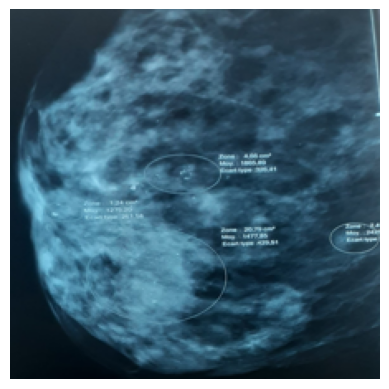

In [836]:
import matplotlib.pyplot as plt
# Display the first image
plt.imshow(image_data[0])
plt.axis('off')
plt.show()

In [837]:
# Split the data into train and test sets
train_size = int(0.8 * len(df1))
train_features, test_features = features[:train_size], features[train_size:]
train_labels, test_labels = labels[:train_size], labels[train_size:]
train_images, test_images = image_data[:train_size], image_data[train_size:]

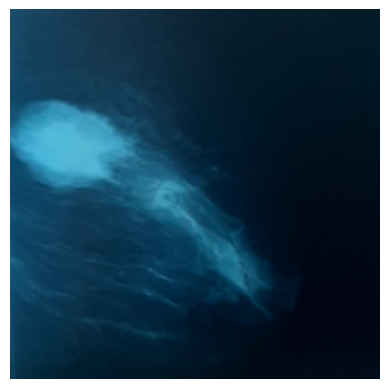

In [838]:
plt.imshow(train_images[47])
plt.axis('off')
plt.show()

In [839]:
train_labels[47]

0

In [840]:
nan_values = df1.isna().any()

# Afficher les colonnes contenant des valeurs NaN
columns_with_nan = nan_values[nan_values == True].index
print("Colonnes contenant des valeurs NaN :")
print(columns_with_nan)

Colonnes contenant des valeurs NaN :
Index([], dtype='object')


In [841]:
def Dataset_loader(DIR, RESIZE, sigmaX=10):
    IMG = []
    read = lambda imname: np.asarray(Image.open(imname).convert("RGB"))
    for IMAGE_NAME in tqdm(os.listdir(DIR)):
        PATH = os.path.join(DIR,IMAGE_NAME)
        _, ftype = os.path.splitext(PATH)
        if ftype == ".jpg":
            img = read(PATH)
           
            img = cv2.resize(img, (RESIZE,RESIZE))
           
            IMG.append(np.array(img))
    return IMG

In [842]:
len(image_data)

61

In [843]:
from sklearn.utils import compute_class_weight
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(df1['Rechute']), y=df1['Rechute'])

In [844]:
# Reset random seeds for reproducibility
reset_random_seeds(42)

In [845]:
from tensorflow.keras.layers import RepeatVector,Permute

In [846]:
from tensorflow.keras.layers import MultiHeadAttention
from tensorflow.keras.layers import concatenate

In [847]:
# Create multi-modal model
model = multi_modal_model(train_features, train_images)

Dimensions des données fusionnées : (None, 300)


In [848]:
# Define the optimizer
optimizer = Adam(learning_rate=0.0001)
# Compile the model with the optimizer
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [850]:
# Train the model
batch_size = 16
epochs = 20
history = model.fit([train_features, train_images], train_labels, batch_size=batch_size, epochs=epochs,verbose=1)

Epoch 1/20
3/3 [==============================] - 11s 4s/step - loss: 22.5849 - accuracy: 0.1458
Epoch 2/20
3/3 [==============================] - 12s 4s/step - loss: 24.8998 - accuracy: 0.1458
Epoch 3/20
3/3 [==============================] - 12s 4s/step - loss: 13.5074 - accuracy: 0.1458
Epoch 4/20
3/3 [==============================] - 13s 4s/step - loss: 5.6750 - accuracy: 0.1458
Epoch 5/20
3/3 [==============================] - 13s 4s/step - loss: 2.7224 - accuracy: 0.1458
Epoch 6/20
3/3 [==============================] - 13s 4s/step - loss: 1.7317 - accuracy: 0.1458
Epoch 7/20
3/3 [==============================] - 13s 4s/step - loss: 0.9886 - accuracy: 0.1458
Epoch 8/20
3/3 [==============================] - 12s 4s/step - loss: 0.3432 - accuracy: 0.1458
Epoch 9/20
3/3 [==============================] - 12s 4s/step - loss: 0.3338 - accuracy: 0.1458
Epoch 10/20
3/3 [==============================] - 12s 4s/step - loss: 0.4398 - accuracy: 0.1458
Epoch 11/20
3/3 [===================

In [852]:
test_predictions = model.predict([test_features,test_images])

1/1 [==============================] - 1s 535ms/step


In [854]:
from sklearn.metrics import recall_score
acc = accuracy_score(test_labels, test_predictions)

In [855]:
print(acc)

0.15384615384615385


# Data Augmentation

In [711]:
def load_images_from_paths(file_paths):
    images = []
    for path in file_paths:
        path = path.strip('"')
        image = Image.open(path)
        image = image.convert('RGB')
        image = image.resize((224, 224))  # Resize image to (224, 224)
        image = np.array(image)
        images.append(image)
    return np.array(images)

In [730]:
import os
import numpy as np
import pandas as pd
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load the dataset with numerical clinical data and image paths
#dataset = pd.read_csv('your_dataset.csv')  # Replace 'your_dataset.csv' with the actual dataset filename

# Separate the numerical features and image paths
clinical_data = df1.drop('image_path', axis=1)
image_paths = df1['image_path'].values

# Apply data augmentation to numerical clinical data using SMOTE
smote = SMOTE(sampling_strategy=1)
clinical_data_aug, _ = smote.fit_resample(clinical_data, df1['Rechute'])

In [729]:
clinical_data_aug

,Age,Ménopausée,Origine,Ménarche,Première_grossesse,Parité,Gestité,Avortement,Enceinte,Célibataire,...,Type_Hormonothérapie_NOLVADEX,Castration_Aucune,Castration_MED,Castration_RT,Etat du reste de la glande_CIS,Etat du reste de la glande_Dystrophie,Etat du reste de la glande_Epithéliose (hyperplasie),Etat du reste de la glande_Foyers de C.Infiltrant,Etat du reste de la glande_Paget,Etat du reste de la glande_Saine
0,50,1,0,11.000000,24.000000,2,2,0,0,1,...,1,1,0,0,0,0,1,0,0,0
1,63,1,1,13.304348,19.185185,7,7,0,0,0,...,0,1,0,0,0,0,0,0,0,1
2,37,0,0,14.000000,27.000000,2,2,0,0,0,...,0,1,0,0,0,0,0,0,0,1
3,45,1,1,15.000000,0.000000,0,0,0,0,1,...,1,1,0,0,0,0,0,0,0,1
4,68,1,1,14.000000,19.000000,6,6,0,0,0,...,1,1,0,0,0,0,0,0,0,1
5,48,1,1,13.000000,40.000000,2,6,4,0,0,...,1,1,0,0,0,0,0,0,0,1
6,38,0,1,17.000000,33.000000,2,3,1,0,0,...,1,0,1,0,1,0,0,0,0,0
7,50,1,0,13.304348,19.185185,1,2,1,0,0,...,1,1,0,0,0,0,0,1,0,0
8,55,1,1,13.304348,41.000000,1,2,1,0,0,...,1,1,0,0,0,0,0,0,1,0
9,49,0,0,16.000000,21.000000,3,9,6,0,0,...,1,0,0,1,0,0,0,0,0,1


In [720]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

In [739]:
# Sélectionner les instances positives
positive_instances = df1[df1['Rechute'] == 1]
positive_image_paths = positive_instances['image_path'].tolist()
# Charger les images positives
positive_images = load_images_from_paths(positive_image_paths)

In [740]:
positive_instances

,Age,Ménopausée,Origine,Ménarche,Première_grossesse,Parité,Gestité,Avortement,Enceinte,Célibataire,...,Type_Hormonothérapie_NOLVADEX,Castration_Aucune,Castration_MED,Castration_RT,Etat du reste de la glande_CIS,Etat du reste de la glande_Dystrophie,Etat du reste de la glande_Epithéliose (hyperplasie),Etat du reste de la glande_Foyers de C.Infiltrant,Etat du reste de la glande_Paget,Etat du reste de la glande_Saine
1,63,1,1,13.304348,19.185185,7,7,0,0,0,...,0,1,0,0,0,0,0,0,0,1
5,48,1,1,13.000000,40.000000,2,6,4,0,0,...,1,1,0,0,0,0,0,0,0,1
8,55,1,1,13.304348,41.000000,1,2,1,0,0,...,1,1,0,0,0,0,0,0,1,0
9,49,0,0,16.000000,21.000000,3,9,6,0,0,...,1,0,0,1,0,0,0,0,0,1
11,58,1,1,13.000000,21.000000,6,6,0,0,0,...,0,1,0,0,0,0,0,0,0,1
30,54,1,1,14.000000,18.000000,7,8,1,0,0,...,0,1,0,0,0,0,0,0,0,1
40,34,0,0,13.304348,30.000000,1,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
56,38,0,1,13.000000,38.000000,0,1,0,1,0,...,1,0,1,0,0,0,0,0,0,1
57,41,0,0,13.000000,30.000000,3,6,3,0,0,...,1,1,0,0,0,0,0,0,0,1


In [741]:
# Create an ImageDataGenerator instance with desired augmentation parameters
datagen = ImageDataGenerator(
    rotation_range=180,  # Rotate images randomly by up to 20 degrees
    width_shift_range=0.1,  # Shift images horizontally by up to 10% of the width
    height_shift_range=0.1,  # Shift images vertically by up to 10% of the height
    zoom_range=0.2,  # Zoom in or out on images by up to 20%
    horizontal_flip=True  # Flip images horizontally
)

In [742]:
# Create a directory to store the augmented images
output_dir = 'C:/Users/rimba/Desktop/new_data'
os.makedirs(output_dir, exist_ok=True)

In [743]:
# Generate augmented images and save them to the output directory
for i, image in enumerate(positive_images):
    image = np.expand_dims(image, axis=0)  # Add batch dimension
    augmented_images = datagen.flow(image, batch_size=1, save_to_dir=output_dir, save_prefix='augmented_',
                                    save_format='jpg')
    # Generate and save augmented images
    for j in range(5):  # Generate 10 augmented images per original image
        augmented_image = augmented_images.next()

# Print the total number of augmented images generated
num_augmented_images = len(os.listdir(output_dir))
print("Total number of augmented images:", num_augmented_images)

Total number of augmented images: 45


In [744]:
len(image_data)

61

In [747]:
import numpy as np
# Concaténer les tableaux rechute et image_data en longueur
img_data = np.vstack((image_data,positive))

In [745]:
#Transfer 'jpg' images to an array IMG
def Dataset_loader(DIR, RESIZE, sigmaX=10):
    IMG = []
    read = lambda imname: np.asarray(Image.open(imname).convert("RGB"))
    for IMAGE_NAME in tqdm(os.listdir(DIR)):
        PATH = os.path.join(DIR,IMAGE_NAME)
        _, ftype = os.path.splitext(PATH)
        if ftype == ".jpg":
            img = read(PATH)
           
            img = cv2.resize(img, (RESIZE,RESIZE))
           
            IMG.append(np.array(img))
    return IMG

In [746]:
positive = np.array(Dataset_loader('C:/Users/rimba/Desktop/new_data',224))

100%|██████████| 43/43 [00:00<00:00, 354.59it/s]


In [748]:
len(img_data)

104

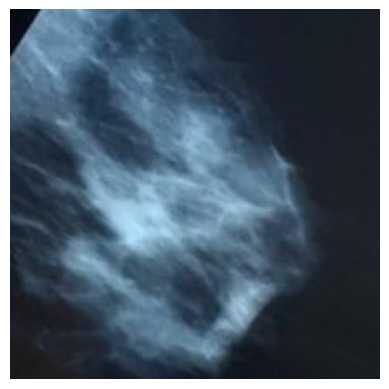

In [751]:
import matplotlib.pyplot as plt
# Display the first image
plt.imshow(img_data[103])
plt.axis('off')
plt.show()

In [864]:
clinical_data = clinical_data_aug.drop('Rechute',axis=1)
labels = clinical_data_aug['Rechute']

In [865]:
# Split the data into train and test sets
test_size = int(0.2 * len(clinical_data))
test_features, train_features = clinical_data[:test_size],clinical_data[test_size:]
test_labels, train_labels = labels[:test_size], labels[test_size:]
test_images, train_images = img_data[:test_size], img_data[test_size:]

In [883]:
test_features

,Age,Ménopausée,Origine,Ménarche,Première_grossesse,Parité,Gestité,Avortement,Enceinte,Célibataire,...,Type_Hormonothérapie_NOLVADEX,Castration_Aucune,Castration_MED,Castration_RT,Etat du reste de la glande_CIS,Etat du reste de la glande_Dystrophie,Etat du reste de la glande_Epithéliose (hyperplasie),Etat du reste de la glande_Foyers de C.Infiltrant,Etat du reste de la glande_Paget,Etat du reste de la glande_Saine
0,50,1,0,11.000000,24.000000,2,2,0,0,1,...,1,1,0,0,0,0,1,0,0,0
1,63,1,1,13.304348,19.185185,7,7,0,0,0,...,0,1,0,0,0,0,0,0,0,1
2,37,0,0,14.000000,27.000000,2,2,0,0,0,...,0,1,0,0,0,0,0,0,0,1
3,45,1,1,15.000000,0.000000,0,0,0,0,1,...,1,1,0,0,0,0,0,0,0,1
4,68,1,1,14.000000,19.000000,6,6,0,0,0,...,1,1,0,0,0,0,0,0,0,1
5,48,1,1,13.000000,40.000000,2,6,4,0,0,...,1,1,0,0,0,0,0,0,0,1
6,38,0,1,17.000000,33.000000,2,3,1,0,0,...,1,0,1,0,1,0,0,0,0,0
7,50,1,0,13.304348,19.185185,1,2,1,0,0,...,1,1,0,0,0,0,0,1,0,0
8,55,1,1,13.304348,41.000000,1,2,1,0,0,...,1,1,0,0,0,0,0,0,1,0
9,49,0,0,16.000000,21.000000,3,9,6,0,0,...,1,0,0,1,0,0,0,0,0,1


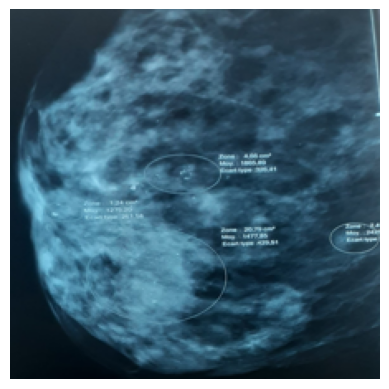

In [866]:
import matplotlib.pyplot as plt
# Display the first image
plt.imshow(test_images[0])
plt.axis('off')
plt.show()

In [867]:
from keras.layers import MaxPooling2D

In [874]:
# Create multi-modal model
model = multi_modal_model(train_features, train_images)

Dimensions des données fusionnées : (None, 300)


In [893]:
# Define the optimizer
optimizer = Adam(learning_rate=0.0001)
# Compile the model with the optimizer
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [894]:
# Train the model
batch_size = 16
epochs = 20
history = model.fit([train_features, train_images], train_labels, batch_size=batch_size, epochs=epochs,verbose=1)

Epoch 1/20
6/6 [==============================] - 13s 2s/step - loss: 0.0011 - accuracy: 0.5595
Epoch 2/20
6/6 [==============================] - 12s 2s/step - loss: 2.8745e-04 - accuracy: 0.5595
Epoch 3/20
6/6 [==============================] - 13s 2s/step - loss: 1.7035e-04 - accuracy: 0.5595
Epoch 4/20
6/6 [==============================] - 13s 2s/step - loss: 2.0877e-05 - accuracy: 0.5595
Epoch 5/20
6/6 [==============================] - 12s 2s/step - loss: 1.6540e-05 - accuracy: 0.5595
Epoch 6/20
6/6 [==============================] - 12s 2s/step - loss: 2.2506e-06 - accuracy: 0.5595
Epoch 7/20
6/6 [==============================] - 12s 2s/step - loss: 3.6318e-06 - accuracy: 0.5595
Epoch 8/20
6/6 [==============================] - 12s 2s/step - loss: 3.7148e-06 - accuracy: 0.5595
Epoch 9/20
6/6 [==============================] - 12s 2s/step - loss: 2.7057e-06 - accuracy: 0.5595
Epoch 10/20
6/6 [==============================] - 13s 2s/step - loss: 2.7535e-06 - accuracy: 0.5595
Epo

In [878]:
test_predictions = model.predict([test_features,test_images])

1/1 [==============================] - 3s 3s/step


In [889]:
from sklearn.metrics import recall_score
acc2 = accuracy_score(test_labels,test_predictions)

In [888]:
from tabulate import tabulate
Data_types = ['Non-augmented Data', 'Augmented_Data']

# Définir les scores pour chaque modèle
scores = [acc, acc2]

# Créer une liste des scores
scores = zip(Data_types,scores)

# Créer une liste des en-têtes de colonnes
headers = ['Data type', 'Score']

# Créer le tableau avec bordures en utilisant tabulate
table = tabulate(scores, headers, tablefmt='pipe')

# Afficher le tableau
print(table)

| Data type          |    Score |
|:-------------------|---------:|
| Non-augmented Data | 0.153846 |
| Augmented_Data     | 0.623234 |


In [884]:
nan_values = clinical_data_aug.isna().any()

# Afficher les colonnes contenant des valeurs NaN
columns_with_nan = nan_values[nan_values == True].index
print("Colonnes contenant des valeurs NaN :")
print(columns_with_nan)

Colonnes contenant des valeurs NaN :
Index([], dtype='object')
